# Prediksi Tingkat Stres Siswa Menggunakan Random Forest dan Analisis Faktor Penyebab



In [ ]:
!pip install langchain_community
!pip install replicate

In [2]:
from google.colab import userdata
import os

# ambil token dari secret
api_token = userdata.get("api_token")

# lempar token ke env var
os.environ["REPLICATE_API_TOKEN"] = api_token

In [3]:
from langchain_community.llms import Replicate

# Define parameters
parameters = {
  "top_k": 5,
  "top_p": 1.0,
  "max_tokens": 4096,
  "min_tokens": 0,
  "random_seed": None,
  "repetition_penalty": 1.0,
  "temperature": 0,
  "stopping_criteria": "length (256 tokens)",
  "stopping_sequence": None
}

# Define the model
llm = Replicate(
  model="ibm-granite/granite-3.3-8b-instruct",
  model_kwargs=parameters
)

In [ ]:
!pip install pandas
!pip install -U langchain langchain-community langchain-experimental replicate

In [5]:
# 1. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
# 2. Load dataset
df = pd.read_csv("/content/StressLevelDataset.csv")
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (1100, 21)
   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3

In [7]:
# Ambil deskripsi kolom dataset
columns = ", ".join(df.columns)

prompt = f"""
We have a dataset with the following features: {columns}.
The target variable is 'stress_level'.

Please suggest:
1. Which features might have the strongest influence on stress_level?
2. What kind of machine learning model could be effective here?
3. Please explain how feature importance from Random Forest can be interpreted.
"""

response = llm.invoke(prompt)
print(response)


1. **Features with Strongest Influence on Stress_Level:**

   Given the nature of the dataset, several features seem likely to have a strong influence on stress_level:

   - **Anxiety_level**: Directly related to stress.
   - **Self_esteem**: Low self-esteem can contribute to higher stress.
   - **Mental_health_history**: Previous mental health issues often correlate with higher stress levels.
   - **Depression**: Depression is a significant stressor.
   - **Headache**: Chronic headaches can be stress-inducing.
   - **Sleep_quality**: Poor sleep quality is a known stress indicator.
   - **Breathing_problem**: Respiratory issues can cause stress and anxiety.
   - **Noise_level**: High noise levels can increase stress.
   - **Living_conditions**: Unstable or poor living conditions can be stressful.
   - **Safety**: Feeling unsafe can cause chronic stress.
   - **Basic_needs**: Insecurity about basic needs (food, shelter) can be a significant stressor.
   - **Academic_performance**: Poor 

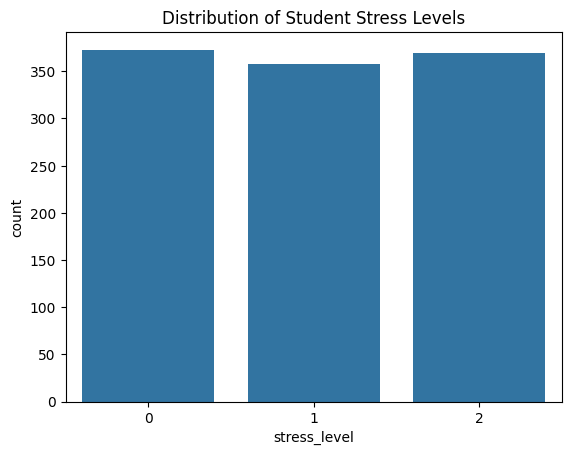

stress_level
0    373
2    369
1    358
Name: count, dtype: int64


In [8]:
# 3. Cek distribusi target stress_level
sns.countplot(x="stress_level", data=df)
plt.title("Distribution of Student Stress Levels")
plt.show()

print(df["stress_level"].value_counts())

In [9]:
# 4. Pisahkan Fitur dan Target
X = df.drop("stress_level", axis=1)
y = df["stress_level"]

In [10]:
# 5. Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# 6. Train Model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# 7. Evaluasi
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8909090909090909

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88        74
           1       0.89      0.93      0.91        72
           2       0.86      0.91      0.88        74

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



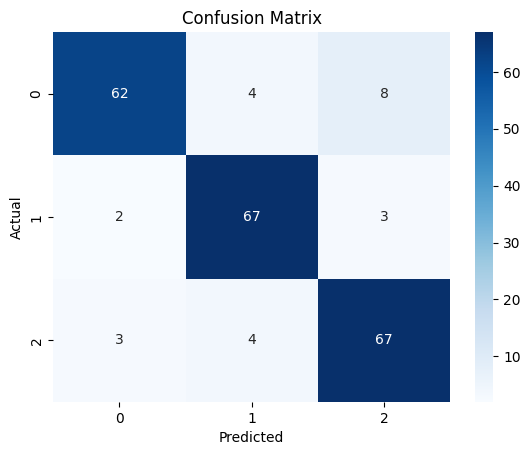

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

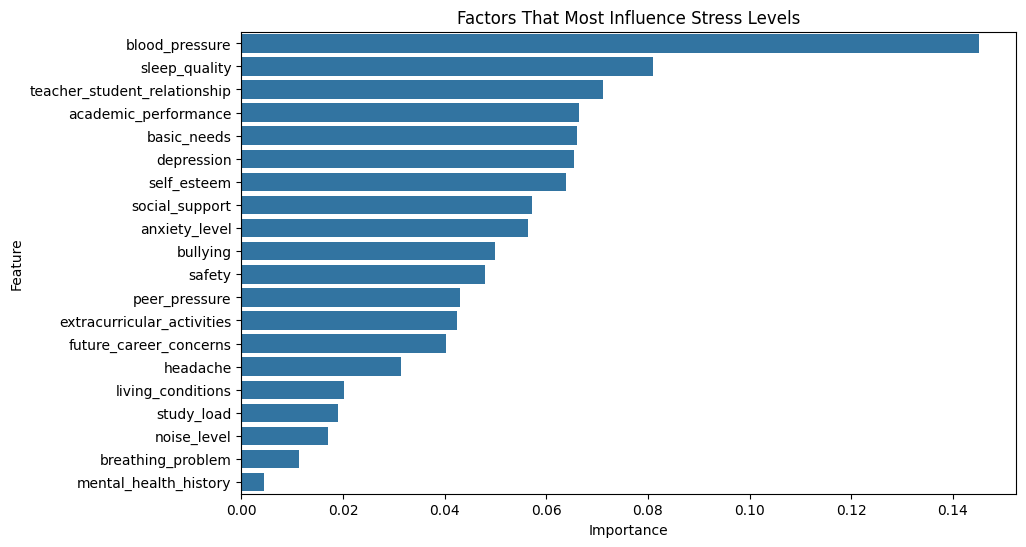

                         Feature  Importance
5                 blood_pressure    0.145205
6                  sleep_quality    0.080919
14  teacher_student_relationship    0.071258
12          academic_performance    0.066403
11                   basic_needs    0.066138
3                     depression    0.065374
1                    self_esteem    0.063838
16                social_support    0.057248
0                  anxiety_level    0.056321
19                      bullying    0.049969
10                        safety    0.048004
17                 peer_pressure    0.043071
18    extracurricular_activities    0.042481
15        future_career_concerns    0.040237
4                       headache    0.031334
9              living_conditions    0.020191
13                    study_load    0.018958
8                    noise_level    0.017141
7              breathing_problem    0.011390
2          mental_health_history    0.004521


In [14]:
# 8. Feature Importance
importances = rf.feature_importances_
features = X.columns

feat_imp = pd.DataFrame({"Feature": features, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp)
plt.title("Factors That Most Influence Stress Levels")
plt.show()

print(feat_imp)

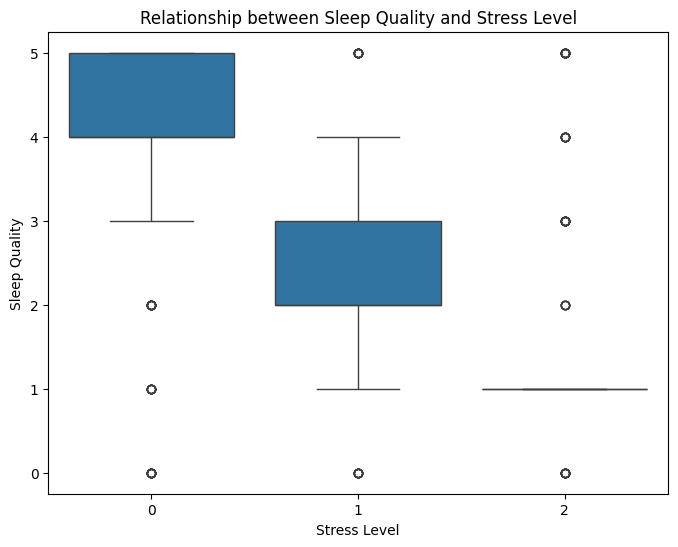

In [15]:
# 9. Hubungan Kualitas Tidur dengan Stress
plt.figure(figsize=(8, 6))
sns.boxplot(x='stress_level', y='sleep_quality', data=df)
plt.title('Relationship between Sleep Quality and Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Quality')
plt.show()

**Kesimpulan dari Plot Hubungan Kualitas Tidur dan Tingkat Stress:**

Berdasarkan box plot di atas, terlihat adanya tren di mana tingkat stres yang lebih tinggi cenderung berkaitan dengan kualitas tidur yang lebih rendah. Rata-rata (garis tengah dalam box) dan rentang kualitas tidur (ukuran box) tampak menurun seiring dengan meningkatnya tingkat stres dari 0 ke 2.

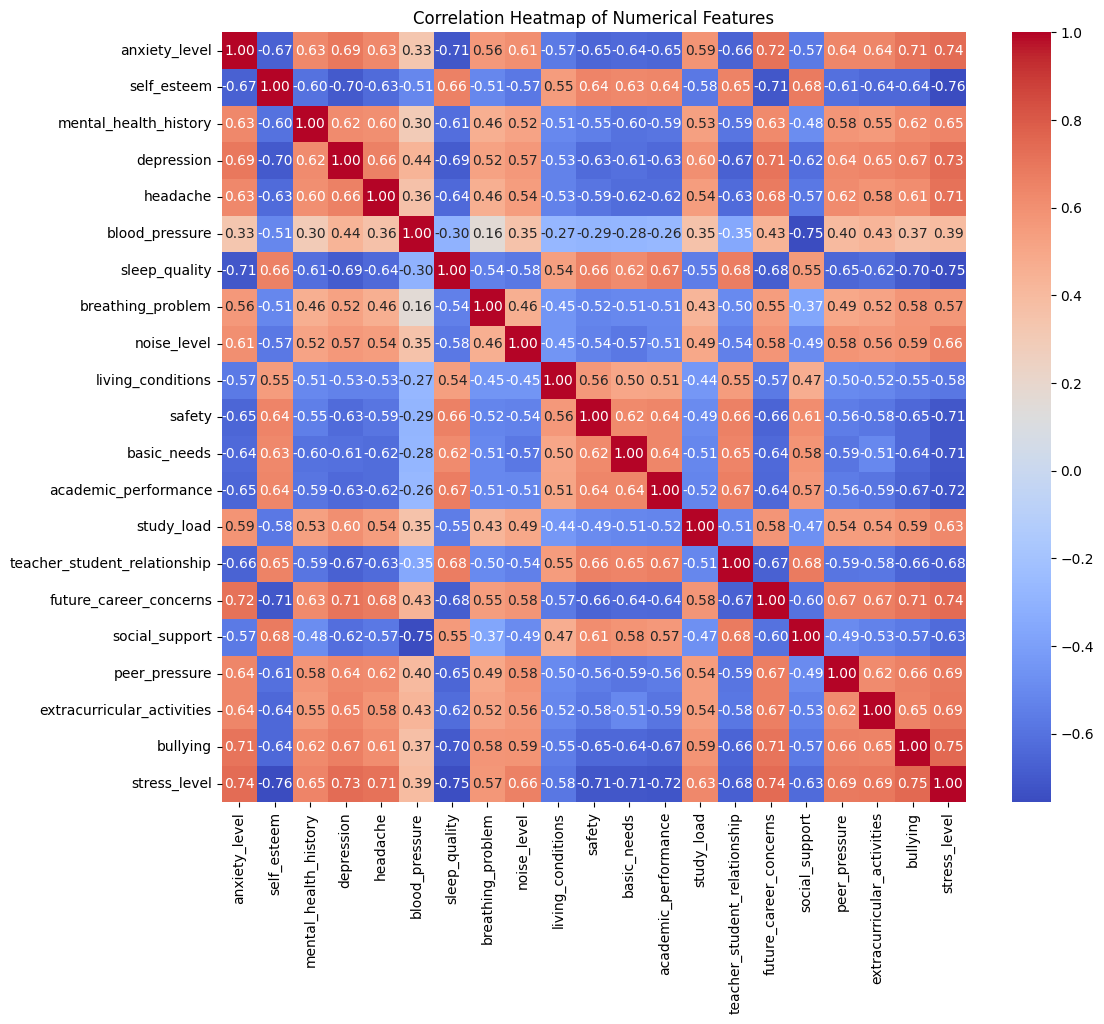

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### **Kesimpulan Analisis Tingkat Stress Siswa**

Berdasarkan analisis Random Forest Classifier terhadap dataset Tingkat Stress Siswa, diperoleh beberapa temuan kunci:

1.  **Performa Model:** Model Random Forest mencapai akurasi sebesar **89.1%** pada data uji. Hasil Classification Report menunjukkan performa yang konsisten baik untuk memprediksi ketiga kategori tingkat stres (0, 1, dan 2), dengan nilai precision, recall, dan f1-score yang seimbang di sekitar angka 0.89. Confusion Matrix lebih lanjut mengkonfirmasi kemampuan model dalam membedakan antar kelas dengan cukup baik.

2.  **Faktor Paling Berpengaruh:** Berdasarkan Feature Importance dari model Random Forest, faktor **Tekanan Darah (blood_pressure)** memiliki pengaruh paling dominan terhadap tingkat stres, diikuti oleh **Kualitas Tidur (sleep_quality)**, **Hubungan Guru-Siswa (teacher_student_relationship)**, dan **Performa Akademik (academic_performance)**. Temuan ini mengindikasikan bahwa indikator fisiologis dan lingkungan belajar memiliki kontribusi signifikan dalam menentukan tingkat stress siswa.

3.  **Hubungan Kualitas Tidur dan Tingkat Stress:** Analisis visual menggunakan box plot menunjukkan korelasi negatif yang jelas antara kualitas tidur dan tingkat stress. Semakin rendah kualitas tidur, semakin tinggi kecenderungan siswa mengalami tingkat stres yang lebih tinggi. Hal ini menggarisbawahi pentingnya kualitas tidur sebagai indikator dan potensi intervensi untuk manajemen stress.

4.  **Insight Akhir:** Dataset ini sangat berguna untuk mengidentifikasi faktor-faktor risiko utama yang berkontribusi pada tingkat stress siswa. Hasil analisis dapat menjadi dasar untuk merancang program intervensi yang lebih tepat sasaran, seperti dukungan konseling, perbaikan kualitas tidur, peningkatan hubungan guru-siswa, dan strategi manajemen beban akademik, guna meningkatkan kesejahteraan mental siswa secara keseluruhan.